In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
def turntodeg(turn,offset=0,dire=1):
    degs=[]
    for i in turn:
        degs.append(dire*i*0.045+offset)
    return degs
def ext2int(ext):
    ints=[]
    for i in ext:
        ints.append((180/np.pi)*(np.arcsin((np.sin((np.pi/180)*i-(np.pi/4))/1.53))+(np.pi/4)))
    return ints
def Normaliser(voltages):
    Normed=[]
    for i in voltages:
        Normed.append(i/np.max(voltages))
    return Normed
def myLoadfunc(data,direction,offset=14.5,plot=False,hideres=True,plotexts=True):
    Ti,Vi = np.loadtxt(data,unpack=True)
    if direction=='forward':
        degs= turntodeg(Ti,offset=offset,dire=1)
    elif direction=='reverse':
        degs=turntodeg(Ti,offset=(offset+45),dire=-1)
    ints=ext2int(degs)
    norms= Normaliser(Vi)
    finalres=[degs,ints,norms]
    if plot == True:
        plt.plot(ints,norms)
        if plotexts==True:
            plt.plot(degs,norms)
        plt.grid(True)
        #plt.legend(['Internal','External'])
    if  hideres==False:
        return finalres
    

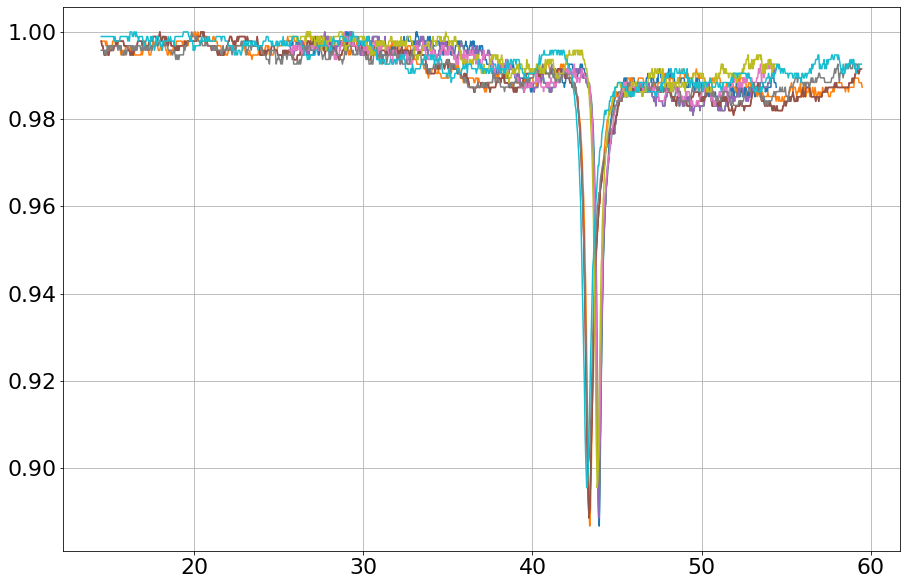

In [3]:
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt4GC.txt"\
           ,'reverse',plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt5GC.txt"\
           ,'forward',plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt6GC.txt"\
           ,'forward',plot=True)
#myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt7GC.txt"\
           #,'reverse',plot=True)
#That one removed since outlier
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt8GC.txt"\
           ,'forward',plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt3GC.txt"\
           ,'forward',plot=True)

In [4]:
Set4=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt4GC.txt"\
           ,'reverse',hideres=False))
Set5=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt5GC.txt"\
           ,'forward',hideres=False)
Set6=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt6GC.txt"\
           ,'forward',hideres=False)
Set8=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt8GC.txt"\
           ,'forward',hideres=False)
Set3=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt3GC.txt"\
           ,'forward',hideres=False)
Dataset=[Set3,Set4,Set5,Set6,Set8]

In [5]:
print(Dataset[0][2])

[0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9978893217326388, 0.9989446608663194, 0.9978893217326388, 0.9978893217326388, 0.9978893217326388, 0.9978893217326388, 0.9978893217326388, 0.9978893217326388, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9978893217326388, 0.9989446608663194, 0.9978893217326388, 1.0, 1.0, 1.0, 0.9989446608663194, 0.9989446608663194, 1.0, 1.0, 0.9989446608663194, 1.0, 0.9989446608663194, 0.9989446608663194, 0.9978893217326388, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446608663194, 0.9989446

In [6]:
def AvgFunc(listData):
    average=np.zeros((3,1000))
    devs=[]
    llv=[]
    i=0
    
    for data in listData:
        data=np.array(data)
        average=np.add(average,data)
        data=np.transpose(data)
        llv.append(data[:,2])
    llv=np.transpose(np.array(llv))
    #print(len(llv[:,0]))

    while i<len(llv[:,0]):
        #print(i)
        std=np.std(llv[0:len(llv)][i])
        devs.append(std)
        i+=1
        
    average=average/np.shape(listData)[0]
    return [average,devs]
         

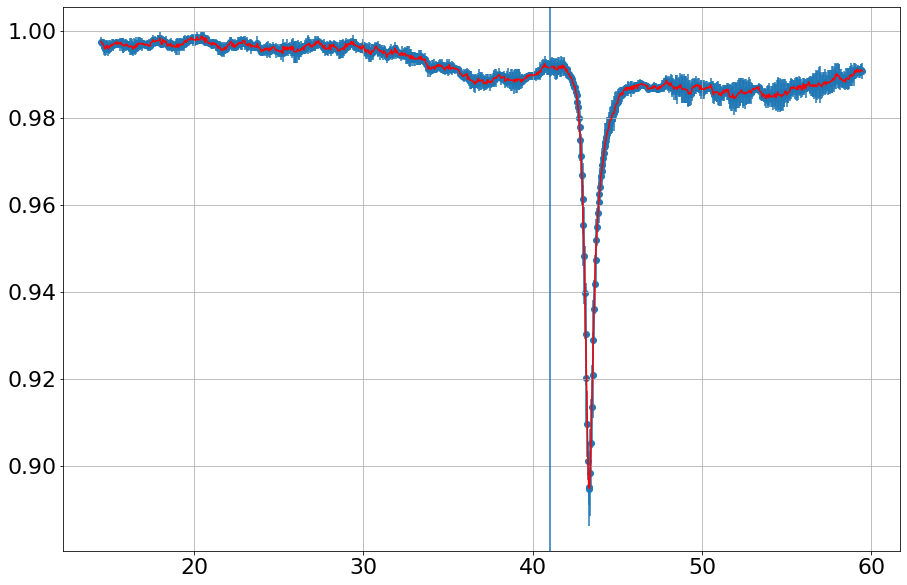

In [7]:
Average1=AvgFunc(Dataset)
#print(Average1[1])
#plt.plot(Average1[0][0],Average1[0][2])
plt.errorbar(Average1[0][0],Average1[0][2],yerr=Average1[1],fmt='o',zorder=1)
plt.plot(Average1[0][0],Average1[0][2],color='r',zorder=2)

#ext
#plt.plot(Average1[1],Average1[2])
plt.grid(True)
plt.axvline(x=41)
#plt.xlim(40,44)


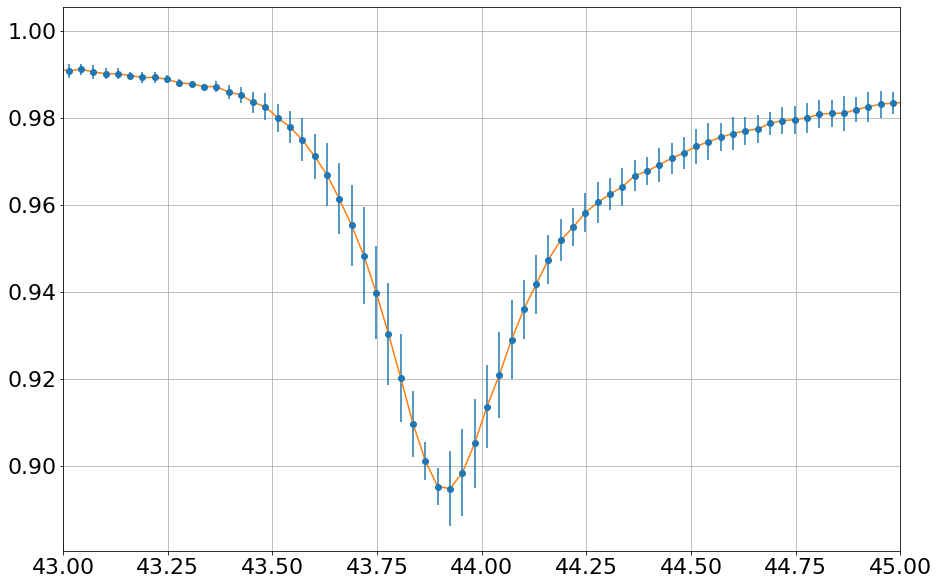

In [8]:
plt.errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],fmt='o')
plt.plot(Average1[0][1],Average1[0][2])
#int
plt.xlim(43,45)
plt.grid(True)

(42.0, 46.0)

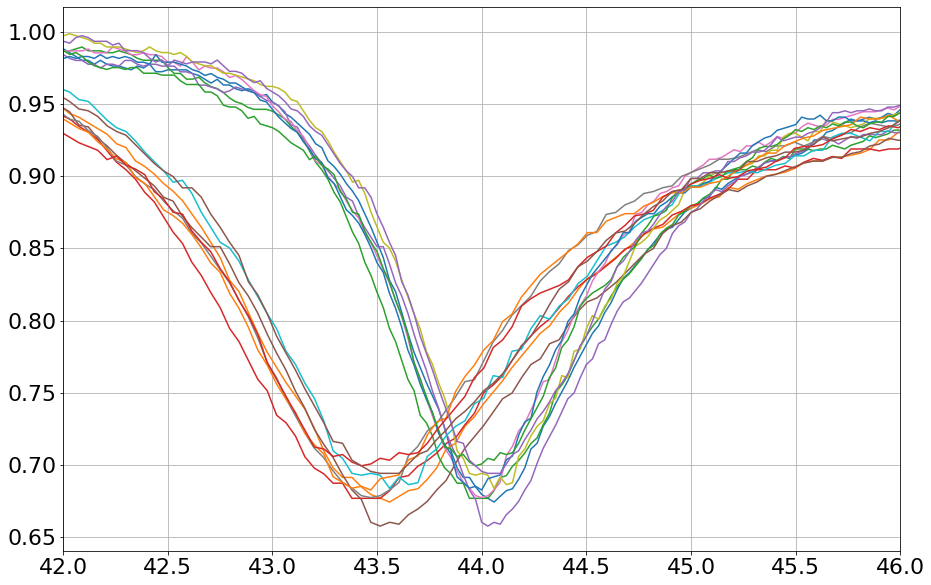

In [9]:
#Green Laser Data:
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt9GC.txt",'reverse',\
           offset=12.6,plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt10GC.txt",'forward',\
           offset=12.6,plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt11GC.txt",'reverse',\
           offset=12.6,plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt12GC.txt",'forward',\
           offset=12.6,plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt13GC.txt",'reverse',\
           offset=12.6,plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt14GC.txt",'forward',\
          offset=12.6,plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt15GC.txt",'forward',\
           offset=12.6,plot=True)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt16GC.txt",'reverse',\
           offset=12.6,plot=True)
plt.xlim(42,46)

In [10]:
#Sample of how functions are used
set9=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt9GC.txt",'reverse',\
           offset=12.6,hideres=False))
set10=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt10GC.txt",'forward',\
           offset=12.6,hideres=False)
set11=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt11GC.txt",'reverse',\
           offset=12.6,hideres=False))
set12=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt12GC.txt",'forward',\
           offset=12.6,hideres=False)
set13=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt13GC.txt",'reverse',\
           offset=12.6,hideres=False))
set14=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt14GC.txt",'forward',\
          offset=12.6,hideres=False)
set15=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt15GC.txt",'forward',\
           offset=12.6,hideres=False)
set16=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt16GC.txt",'reverse',\
           offset=12.6,hideres=False))
greenforward=[set10,set12,set14,set15]
greenreverse=[set9,set11,set13,set16]
greenall=[set10,set12,set14,set15,set9,set11,set13,set16]
Averagegf=AvgFunc(greenforward)
Averagegr=AvgFunc(greenreverse)
Averageg=AvgFunc(greenall)

(42.0, 47.0)

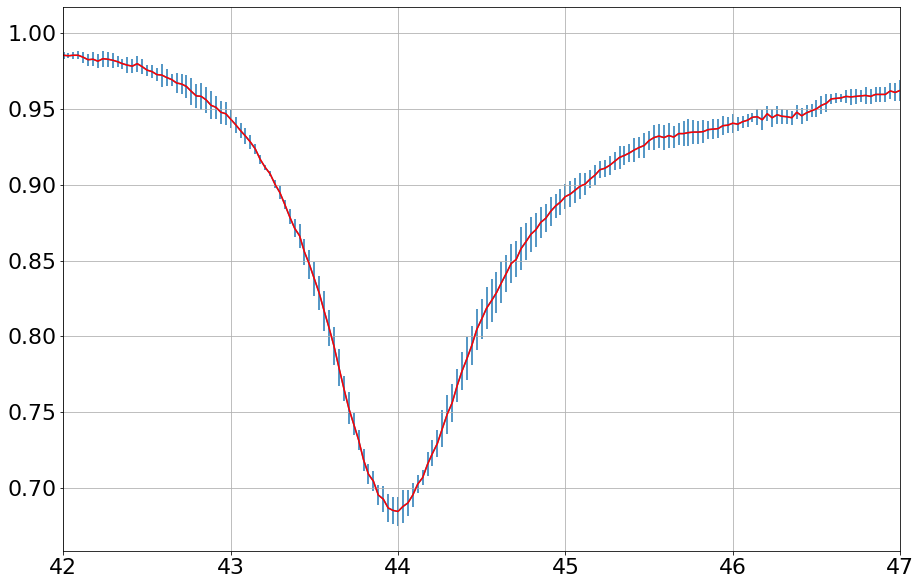

In [11]:
plt.errorbar(Averagegf[0][1],Averagegf[0][2],yerr=Averagegf[1],zorder=1)
plt.plot(Averagegf[0][1],Averagegf[0][2],color='r',zorder=2)
plt.grid(True)
plt.xlim(42,47)

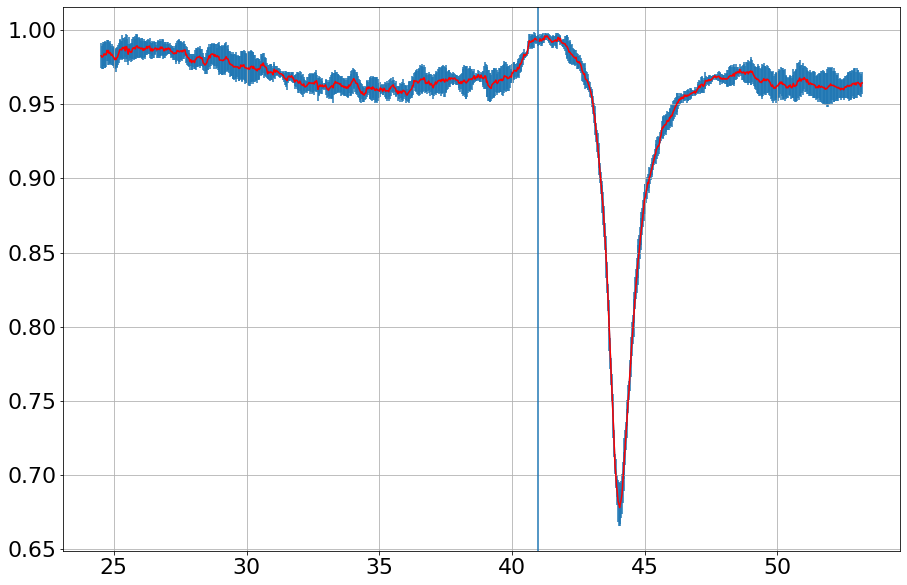

In [12]:
plt.errorbar(Averagegr[0][1],Averagegr[0][2],yerr=Averagegr[1],zorder=1)
plt.plot(Averagegr[0][1],Averagegr[0][2],color='r',zorder=2)
plt.grid(True)
plt.axvline(x=41)
#plt.xlim(42,47)

(42.0, 47.0)

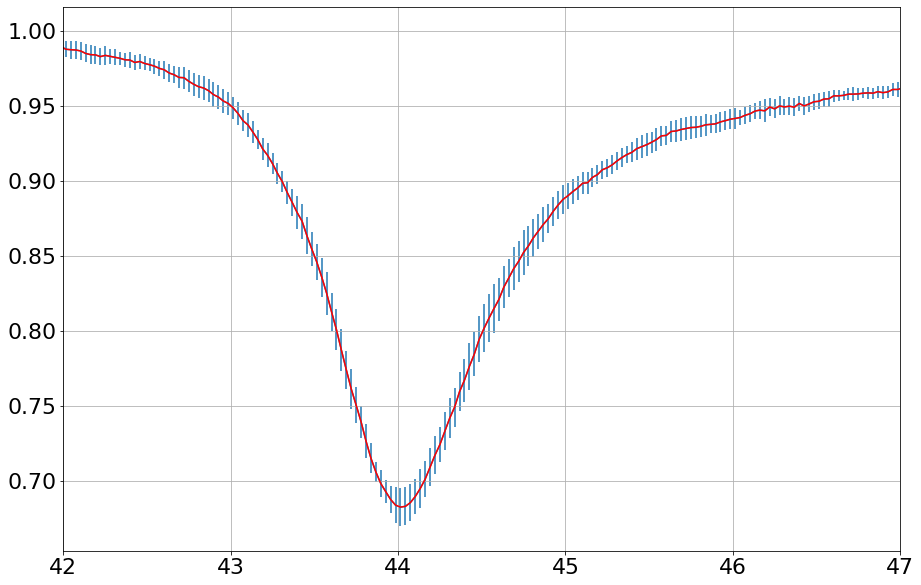

In [13]:
plt.errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1)
plt.plot(Averageg[0][1],Averageg[0][2],color='r',zorder=2)
plt.grid(True)
plt.xlim(42,47)

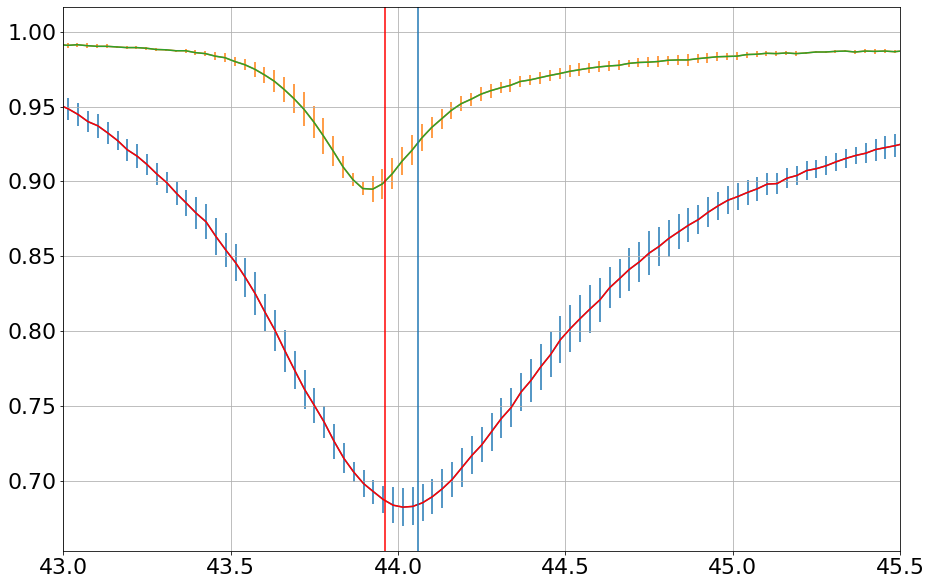

In [14]:
plt.errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1)
plt.plot(Averageg[0][1],Averageg[0][2],color='r',zorder=2)
plt.errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],zorder=1)
plt.plot(Average1[0][1],Average1[0][2],zorder=2)
plt.grid(True)
plt.xlim(43,45.5)
plt.axvline(x=44.06)
plt.axvline(x=43.96,color='r')

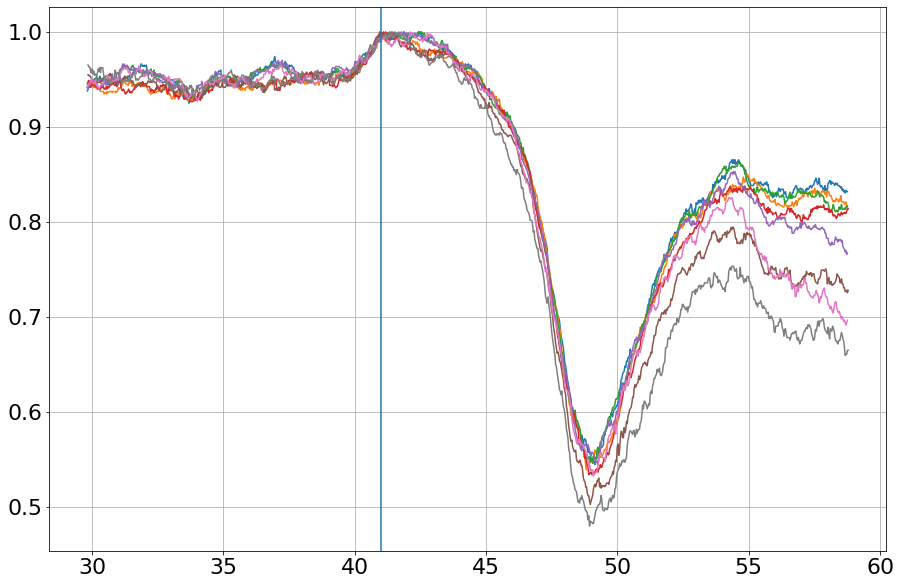

In [15]:
#Blue laser data
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt17GC.txt",'forward',\
           offset=21.38,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt18GC.txt",'reverse',\
           offset=21.38,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt19GC.txt",'forward',\
           offset=21.38,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt20GC.txt",'reverse',\
           offset=21.38,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt21GC.txt",'forward',\
           offset=21.38,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt22GC.txt",'reverse',\
          offset=21.38,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt23GC.txt",'forward',\
           offset=21.38,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt24GC.txt",'reverse',\
           offset=21.38,plot=True,plotexts=False)
plt.axvline(x=41)

In [16]:
Set17=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt17GC.txt",'forward',\
           offset=21.38,hideres=False)
Set18=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt18GC.txt",'reverse',\
           offset=21.38,hideres=False))
Set19=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt19GC.txt",'forward',\
           offset=21.38,hideres=False)
Set20=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt20GC.txt",'reverse',\
           offset=21.38,hideres=False))
Set21=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt21GC.txt",'forward',\
           offset=21.38,hideres=False)
Set22=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt22GC.txt",'reverse',\
          offset=21.38,hideres=False))
Set23=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt23GC.txt",'forward',\
           offset=21.38,hideres=False)
Set24=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt24GC.txt",'reverse',\
           offset=21.38,hideres=False))
Blueset=[Set17,Set18,Set19,Set20,Set21,Set22,Set23,Set24]
Averageb=AvgFunc(Blueset)
#print(Blueset[4][0])

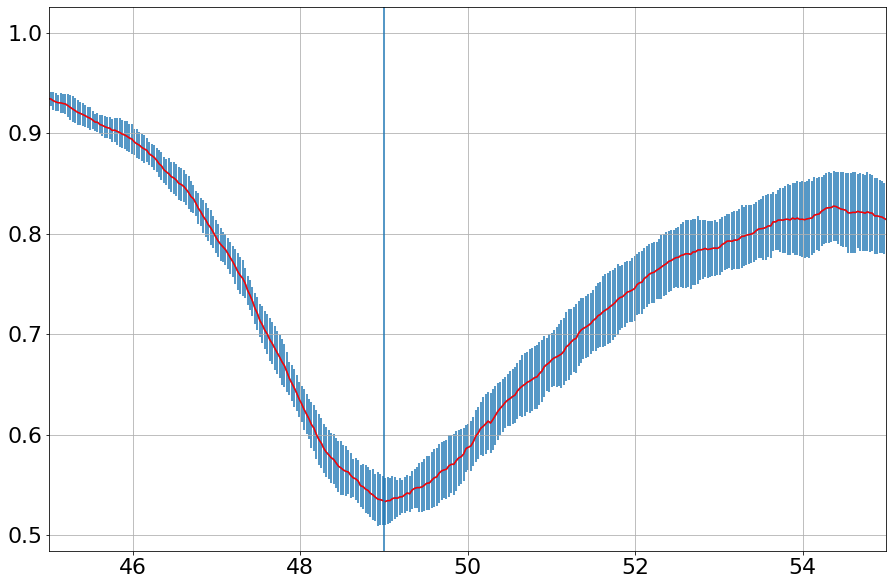

In [17]:
plt.errorbar(Averageb[0][1],Averageb[0][2],yerr=Averageb[1],zorder=1)
plt.plot(Averageb[0][1],Averageb[0][2],color='r',zorder=2)
plt.grid(True)
plt.xlim(45,55)
plt.axvline(x=49)

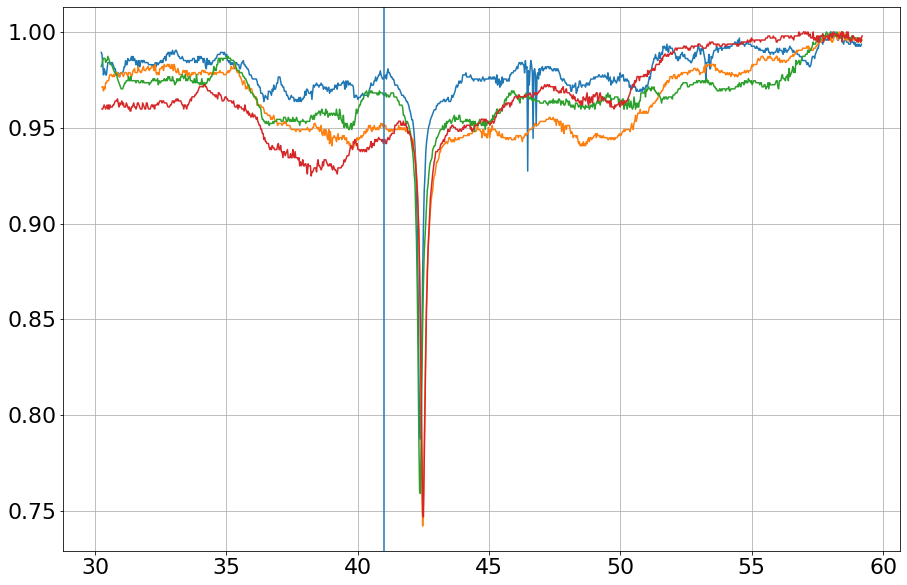

In [18]:
#Red at 13nm
#myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt25GC.txt",'forward',\
           #offset=22.05,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt26GC.txt",'forward',\
           offset=22.05,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt27GC.txt",'reverse',\
           offset=22.05,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt28GC.txt",'forward',\
           offset=22.05,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt29GC.txt",'reverse',\
           offset=22.05,plot=True,plotexts=False)
plt.axvline(x=41)


In [19]:
Set26=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt26GC.txt",'forward',\
           offset=22.05,hideres=False)
Set27=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt27GC.txt",'reverse',\
           offset=22.05,hideres=False))
Set28=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt28GC.txt",'forward',\
           offset=22.05,hideres=False)
Set29=Set26=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt29GC.txt",'reverse',\
           offset=22.05,hideres=False))
Red13Set=[Set26,Set27,Set28,Set29]
AverageR13=AvgFunc(Red13Set)

(40.0, 45.0)

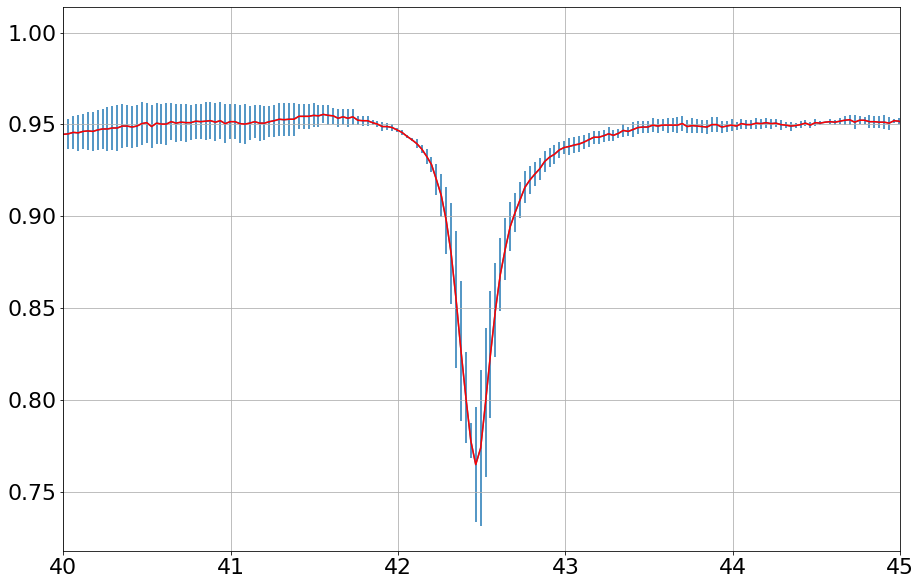

In [20]:
plt.errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1)
plt.plot(AverageR13[0][1],AverageR13[0][2],color='r',zorder=2)
plt.grid(True)
plt.xlim(40,45)
#plt.axvline(x=49)

(40.0, 45.0)

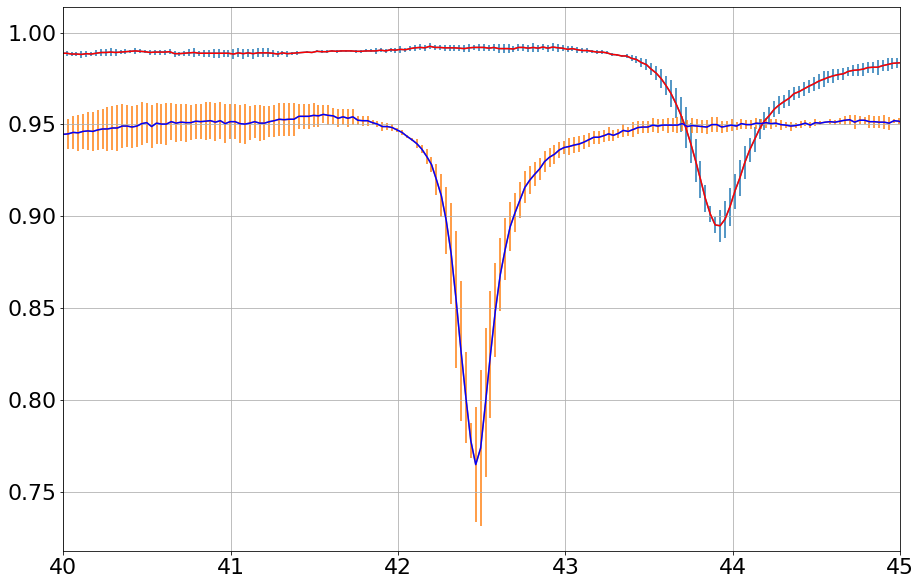

In [21]:
plt.errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],zorder=1)
plt.plot(Average1[0][1],Average1[0][2],color='r',zorder=2)
plt.errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1)
plt.plot(AverageR13[0][1],AverageR13[0][2],color='blue',zorder=2)
plt.grid(True)
plt.xlim(40,45)

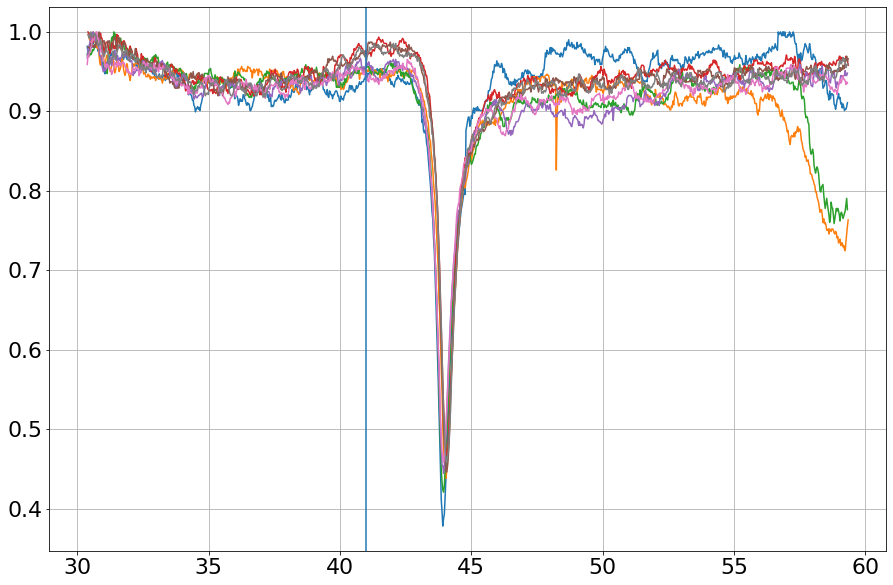

In [22]:
#Green 13 data
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt30GC.txt",'forward',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt31GC.txt",'reverse',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt32GC.txt",'forward',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt33GC.txt",'reverse',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt34GC.txt",'forward',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt35GC.txt",'reverse',\
          offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt36GC.txt",'forward',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt37GC.txt",'reverse',\
           offset=22.28,plot=True,plotexts=False)
plt.axvline(x=41)

In [23]:
Set30=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt30GC.txt",'forward',\
           offset=22.28,hideres=False)
Set31=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt31GC.txt",'reverse',\
           offset=22.28,hideres=False))
Set32=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt32GC.txt",'forward',\
           offset=22.28,hideres=False)
Set33=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt33GC.txt",'reverse',\
           offset=22.28,hideres=False))
Set34=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt34GC.txt",'forward',\
           offset=22.28,hideres=False)
Set35=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt35GC.txt",'reverse',\
          offset=22.28,hideres=False))
Set36=myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt36GC.txt",'forward',\
           offset=22.28,hideres=False)
Set37=np.fliplr(myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt37GC.txt",'reverse',\
           offset=22.28,hideres=False))
Green13set=[Set30,Set31,Set32,Set33,Set34,Set35,Set36,Set37]
AverageG13=AvgFunc(Green13set)

(42.0, 47.0)

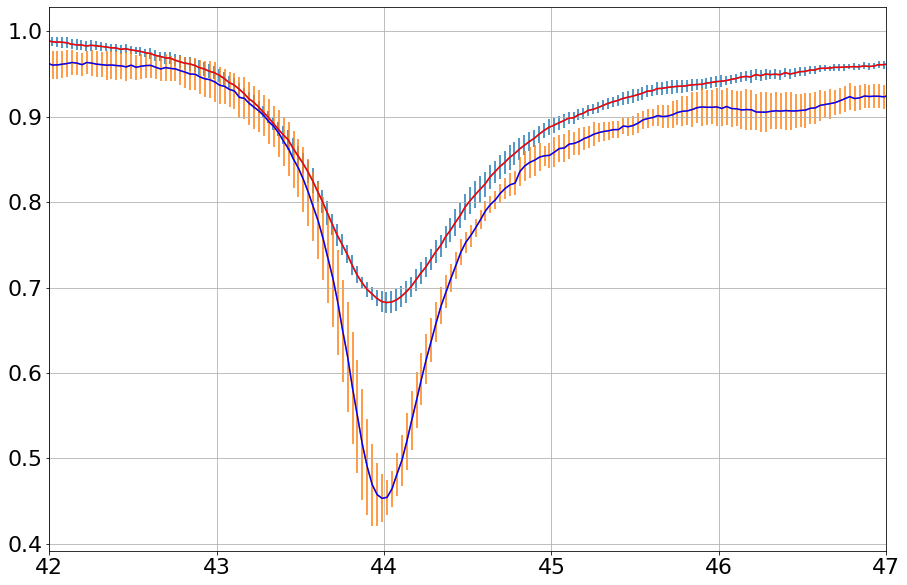

In [24]:
plt.errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1)
plt.plot(Averageg[0][1],Averageg[0][2],color='r',zorder=2)
plt.errorbar(AverageG13[0][1],AverageG13[0][2],yerr=AverageG13[1],zorder=1)
plt.plot(AverageG13[0][1],AverageG13[0][2],color='blue',zorder=2)
plt.grid(True)
plt.xlim(42,47)

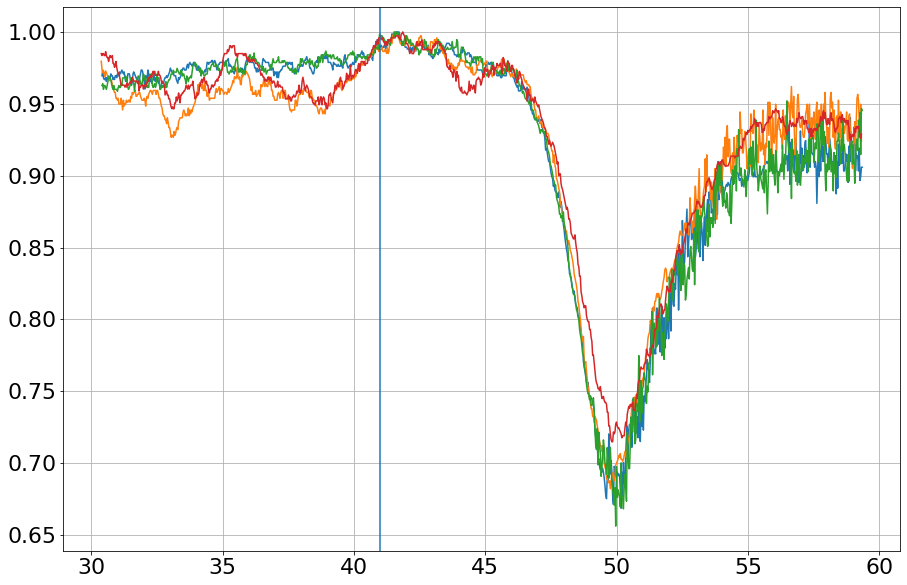

In [25]:
#Blue at 13nm
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt38GC.txt",'reverse',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt39GC.txt",'forward',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt40GC.txt",'reverse',\
           offset=22.28,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt41GC.txt",'forward',\
           offset=22.28,plot=True,plotexts=False)
plt.axvline(x=41)

In [26]:
Set38=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt38GC.txt",'reverse',\
           offset=22.05,hideres=False))
Set39=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt39GC.txt",'forward',\
           offset=22.05,hideres=False)
Set40=Set26=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt40GC.txt",'reverse',\
           offset=22.05,hideres=False))
Set41=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt41GC.txt",'forward',\
           offset=22.05,hideres=False)
Blue13Set=[Set38,Set39,Set40,Set41]
AverageB13=AvgFunc(Blue13Set)

(45.0, 55.0)

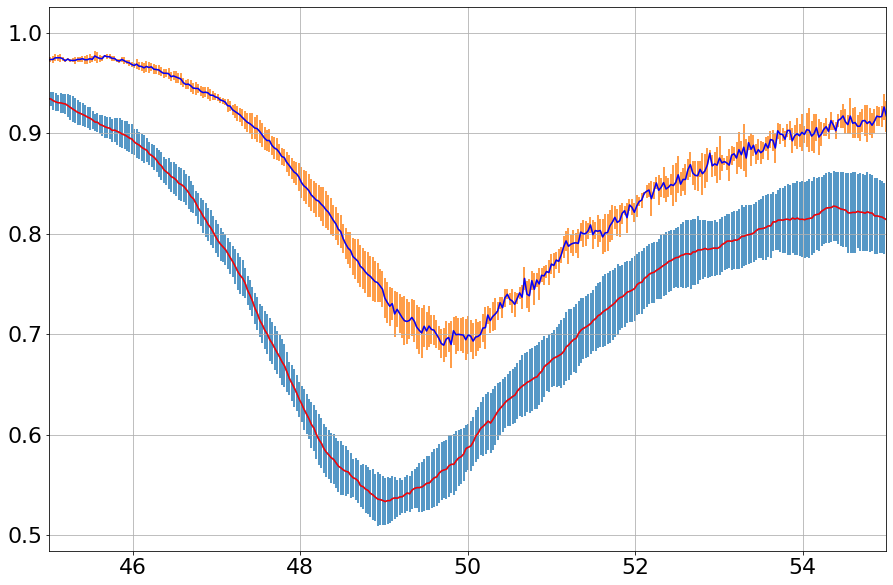

In [27]:
plt.errorbar(Averageb[0][1],Averageb[0][2],yerr=Averageb[1],zorder=1)
plt.plot(Averageb[0][1],Averageb[0][2],color='r',zorder=2)
plt.errorbar(AverageB13[0][1],AverageB13[0][2],yerr=AverageB13[1],zorder=1)
plt.plot(AverageB13[0][1],AverageB13[0][2],color='blue',zorder=2)
plt.grid(True)
plt.xlim(45,55)

(43.0, 45.0)

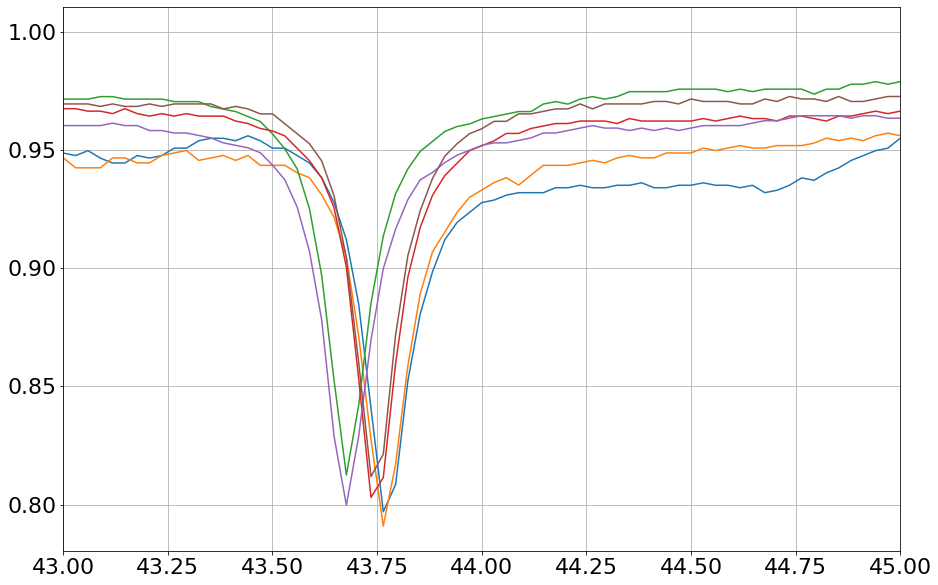

In [28]:
#Red at 15nm
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt42GC.txt",'reverse',\
           offset=22.5,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt43GC.txt",'reverse',\
           offset=22.5,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt44GC.txt",'forward',\
           offset=22.5,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt45GC.txt",'reverse',\
           offset=22.5,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt46GC.txt",'forward',\
           offset=22.5,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt47GC.txt",'reverse',\
          offset=22.5,plot=True,plotexts=False)
plt.xlim(43,45)

In [29]:
Set42=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt42GC.txt",'reverse',\
           offset=22.5,hideres=False))
Set43=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt43GC.txt",'reverse',\
           offset=22.5,hideres=False))
Set44=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt44GC.txt",'forward',\
           offset=22.5,hideres=False)
Set45=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt45GC.txt",'reverse',\
           offset=22.5,hideres=False))
Set46=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt46GC.txt",'forward',\
           offset=22.5,hideres=False)
Set47=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt47GC.txt",'reverse',\
           offset=22.5,hideres=False))
Red15Set=[Set42,Set43,Set44,Set45,Set46,Set47]
AverageR15=AvgFunc(Red15Set)

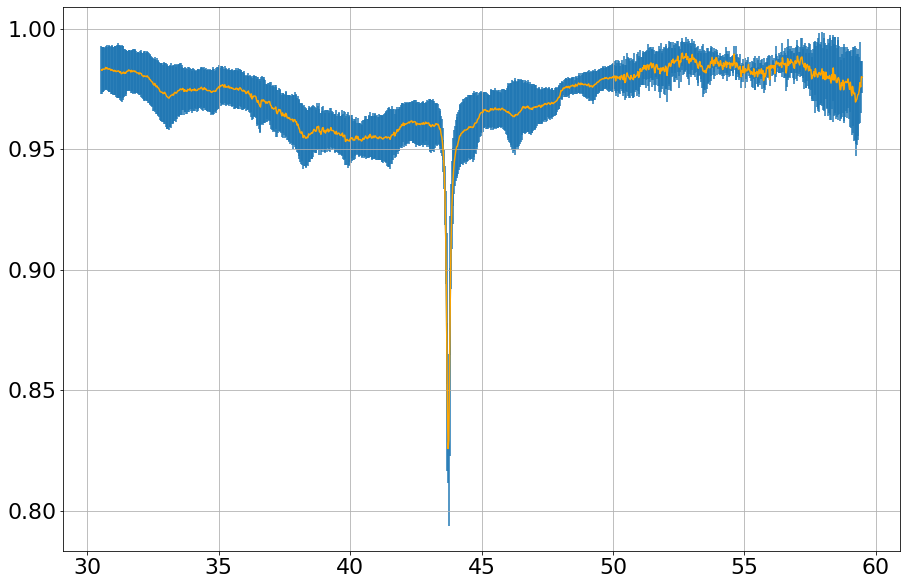

In [30]:
plt.errorbar(AverageR15[0][1],AverageR15[0][2],yerr=AverageR15[1],zorder=1)
plt.plot(AverageR15[0][1],AverageR15[0][2],color='orange',zorder=2)
plt.grid(True)

(40.0, 45.0)

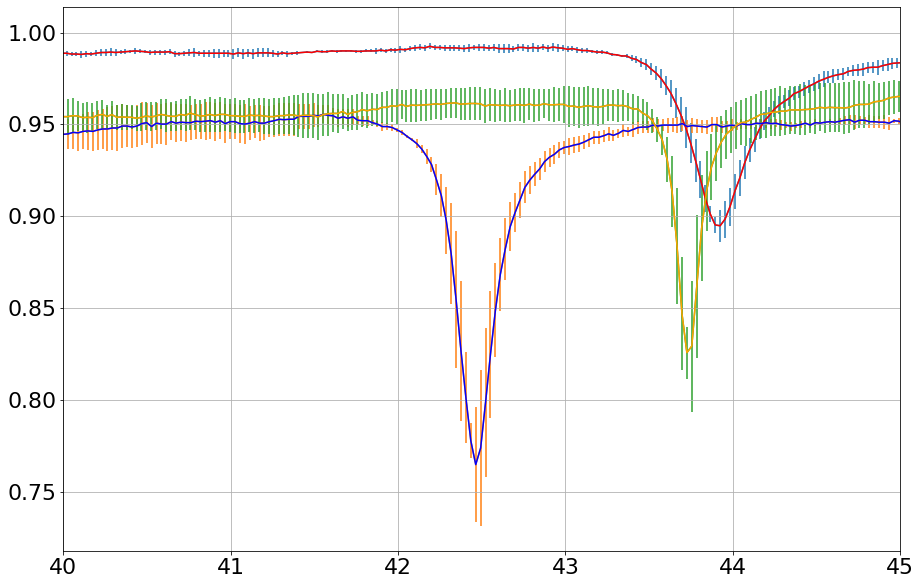

In [31]:
plt.errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],zorder=1)
plt.plot(Average1[0][1],Average1[0][2],color='r',zorder=2)
plt.errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1)
plt.plot(AverageR13[0][1],AverageR13[0][2],color='blue',zorder=2)
plt.errorbar(AverageR15[0][1],AverageR15[0][2],yerr=AverageR15[1],zorder=1)
plt.plot(AverageR15[0][1],AverageR15[0][2],color='orange',zorder=2)
plt.grid(True)
plt.xlim(40,45)

(43.0, 47.0)

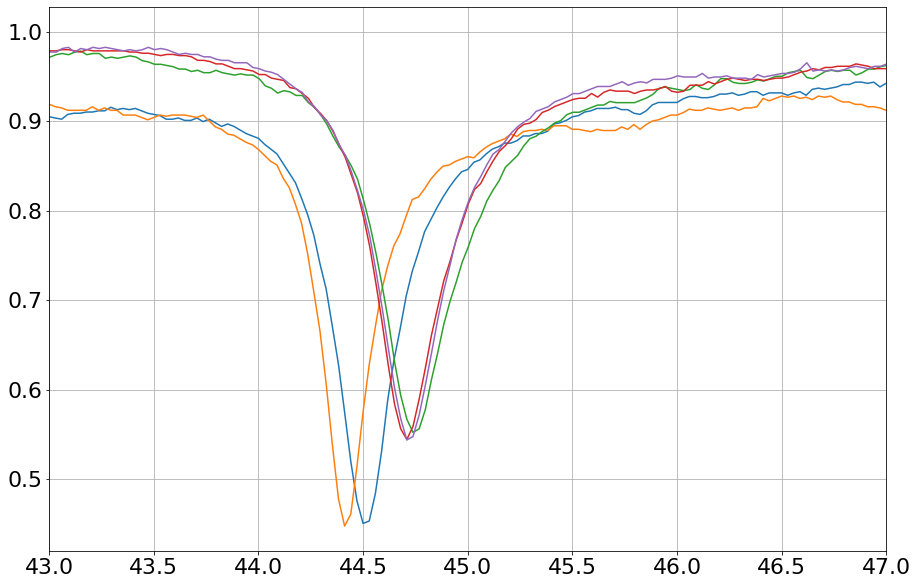

In [32]:
#Green at 15nm
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt50GC.txt",'reverse',\
           offset=22.05,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt51GC.txt",'forward',\
           offset=22.05,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt52GC.txt",'reverse',\
           offset=22.73,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt53GC.txt",'forward',\
           offset=22.73,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt54GC.txt",'forward',\
           offset=22.73,plot=True,plotexts=False)
plt.xlim(43,47)

In [33]:
Set52=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt52GC.txt",'reverse',\
           offset=22.73,hideres=False))
Set53=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt53GC.txt",'forward',\
           offset=22.73,hideres=False)
Set54=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt54GC.txt",'forward',\
           offset=22.73,hideres=False)
Green15Set=[Set52,Set54,Set54]
AverageG15=AvgFunc(Green15Set)


(42.0, 46.0)

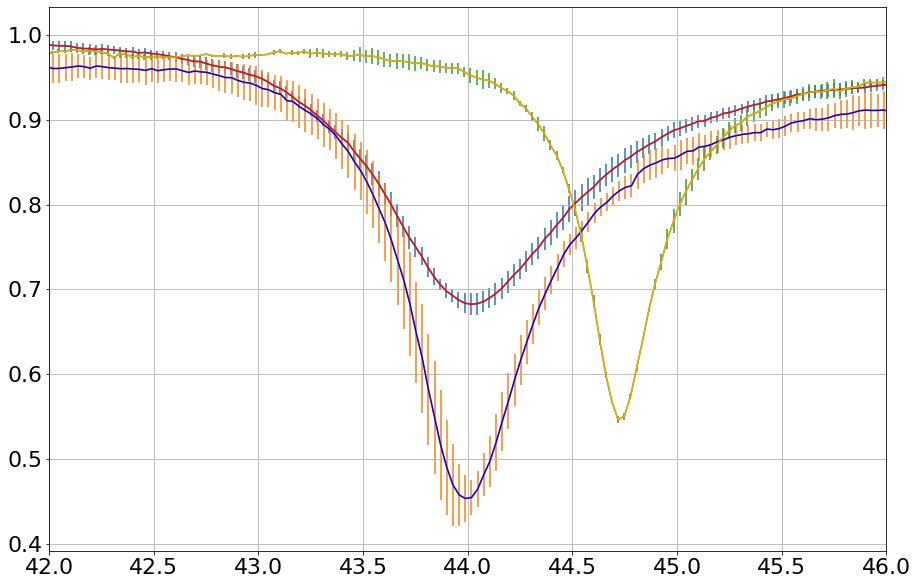

In [34]:
plt.errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1)
plt.plot(Averageg[0][1],Averageg[0][2],color='r',zorder=2)
plt.errorbar(AverageG13[0][1],AverageG13[0][2],yerr=AverageG13[1],zorder=1)
plt.plot(AverageG13[0][1],AverageG13[0][2],color='blue',zorder=2)
plt.errorbar(AverageG15[0][1],AverageG15[0][2],yerr=AverageG15[1],zorder=1)
plt.plot(AverageG15[0][1],AverageG15[0][2],color='orange',zorder=2)
plt.grid(True)
plt.xlim(42,46)
#plt.xlim(39,42)
#plt.ylim(0.9,1)

(39.0, 55.0)

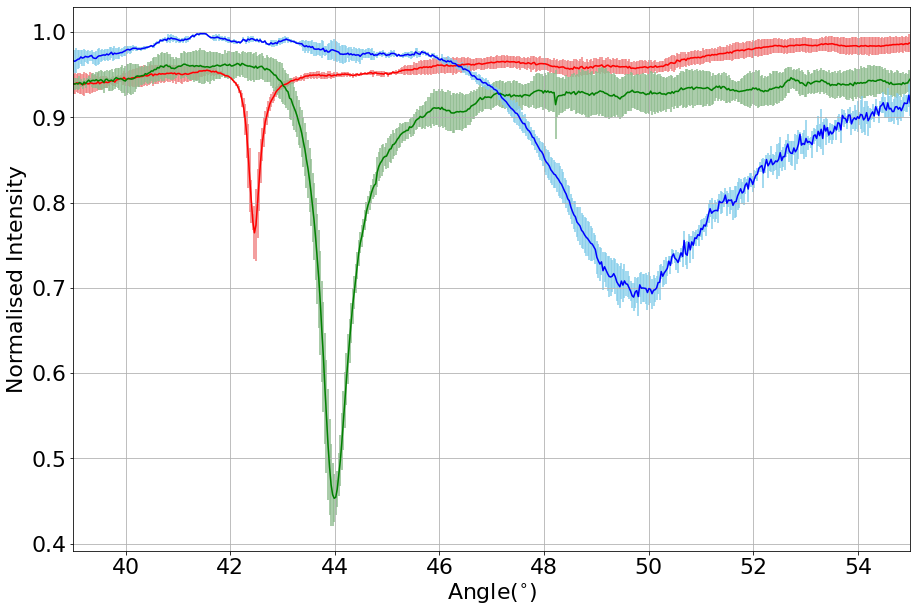

In [53]:
plt.errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1,color='lightcoral')
plt.plot(AverageR13[0][1],AverageR13[0][2],color='red',zorder=2)
plt.errorbar(AverageG13[0][1],AverageG13[0][2],yerr=AverageG13[1],zorder=1,color='darkseagreen')
plt.plot(AverageG13[0][1],AverageG13[0][2],color='green',zorder=2)
plt.errorbar(AverageB13[0][1],AverageB13[0][2],yerr=AverageB13[1],zorder=1,color='skyblue')
plt.plot(AverageB13[0][1],AverageB13[0][2],color='b',zorder=2)
plt.xlabel('Angle($^{\circ}$)')
plt.ylabel('Normalised Intensity')
plt.grid(True)
plt.xlim(39,55)
#plt.ylim(0.9,1)
#plt.xlim(41,43)

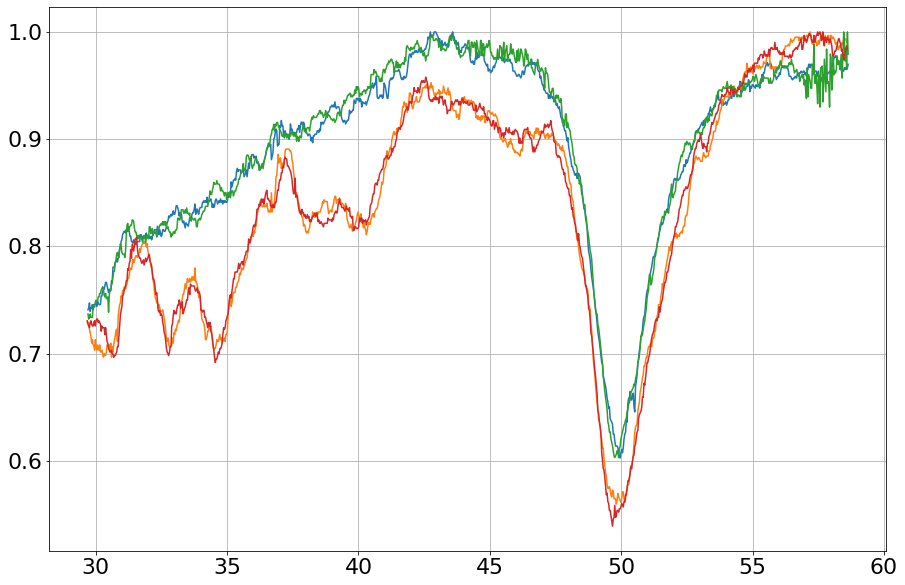

In [36]:
#Blue at 15nm
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt55GC.txt",'reverse',\
           offset=21.15,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt56GC.txt",'forward',\
           offset=21.15,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt57GC.txt",'reverse',\
           offset=21.15,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt58GC.txt",'forward',\
           offset=21.15,plot=True,plotexts=False)


In [37]:
Set55=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt55GC.txt",'reverse',\
           offset=21.15,hideres=False))
Set56=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt56GC.txt",'forward',\
           offset=21.15,hideres=False)
Set57=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt57GC.txt",'reverse',\
           offset=21.15,hideres=False))
Set58=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt58GC.txt",'forward',\
           offset=21.15,hideres=False)
Blue15Set=[Set55,Set56,Set57,Set58]
AverageB15=AvgFunc(Blue15Set)

(45.0, 55.0)

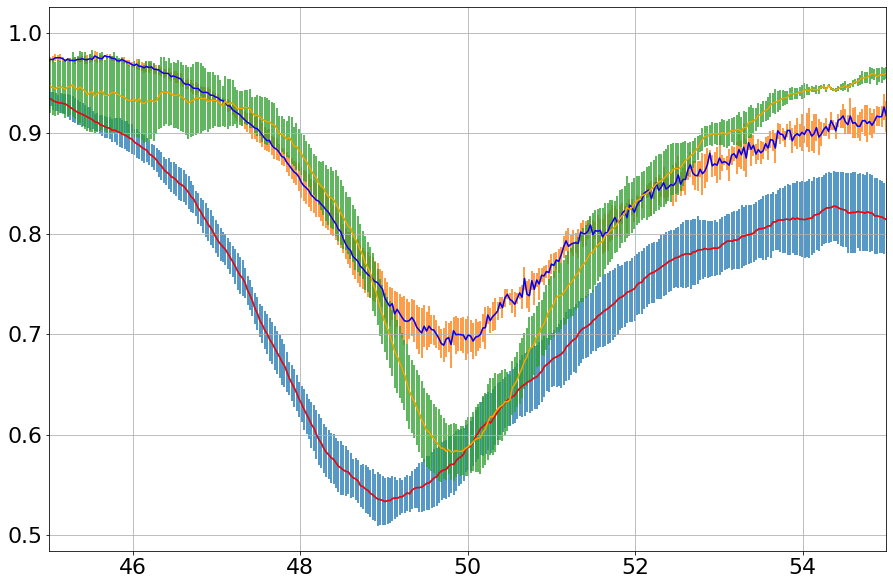

In [38]:
plt.errorbar(Averageb[0][1],Averageb[0][2],yerr=Averageb[1],zorder=1)
plt.plot(Averageb[0][1],Averageb[0][2],color='r',zorder=2)
plt.errorbar(AverageB13[0][1],AverageB13[0][2],yerr=AverageB13[1],zorder=1)
plt.plot(AverageB13[0][1],AverageB13[0][2],color='blue',zorder=2)
plt.errorbar(AverageB15[0][1],AverageB15[0][2],yerr=AverageB15[1],zorder=1)
plt.plot(AverageB15[0][1],AverageB15[0][2],color='orange',zorder=2)
plt.grid(True)
#plt.xlim(39,42)
#plt.ylim(0.8,1)
plt.xlim(45,55)

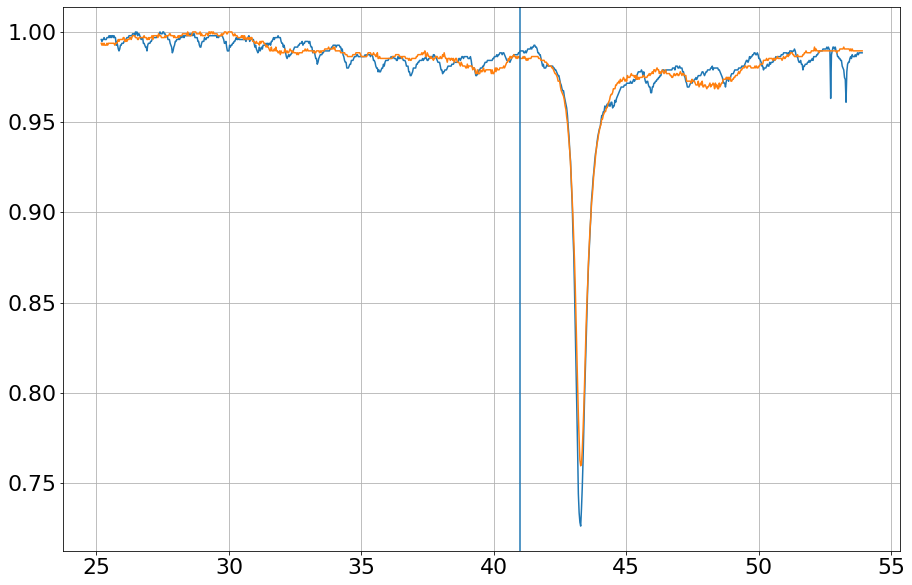

In [39]:
#Red 10nm v2
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt59GC.txt",'forward',\
           offset=13.75,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt61GC.txt",'forward',\
           offset=13.75,plot=True,plotexts=False)
plt.axvline(x=41)

In [40]:
Set59=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt59GC.txt",'forward',\
           offset=15.75,hideres=False)
Set61=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt61GC.txt",'forward',\
           offset=15.75,hideres=False)
Red10V2Set=[Set59,Set61]
AverageR10V2=AvgFunc(Red10V2Set)

(40.0, 45.0)

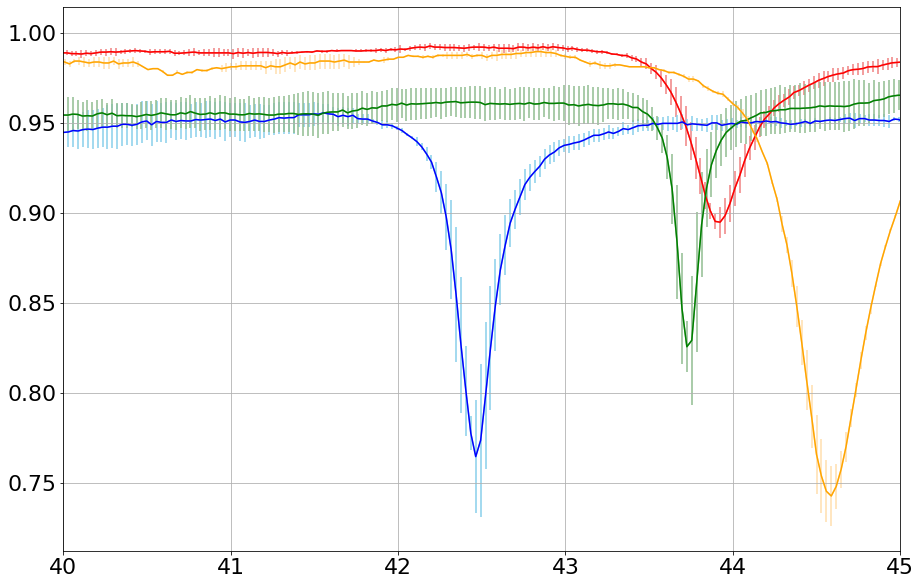

In [81]:
plt.errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],zorder=1,color='lightcoral')
plt.plot(Average1[0][1],Average1[0][2],color='r',zorder=2)
plt.errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1,color='skyblue')
plt.plot(AverageR13[0][1],AverageR13[0][2],color='blue',zorder=2)
plt.errorbar(AverageR15[0][1],AverageR15[0][2],yerr=AverageR15[1],zorder=1,color='darkseagreen')
plt.plot(AverageR15[0][1],AverageR15[0][2],color='green',zorder=2)
plt.errorbar(AverageR10V2[0][1],AverageR10V2[0][2],yerr=AverageR10V2[1],zorder=1,color='navajowhite')
plt.plot(AverageR10V2[0][1],AverageR10V2[0][2],color='orange',zorder=2)
plt.grid(True)
#plt.xlim(39,42)
#plt.ylim(0.9,1)
plt.xlim(40,45)

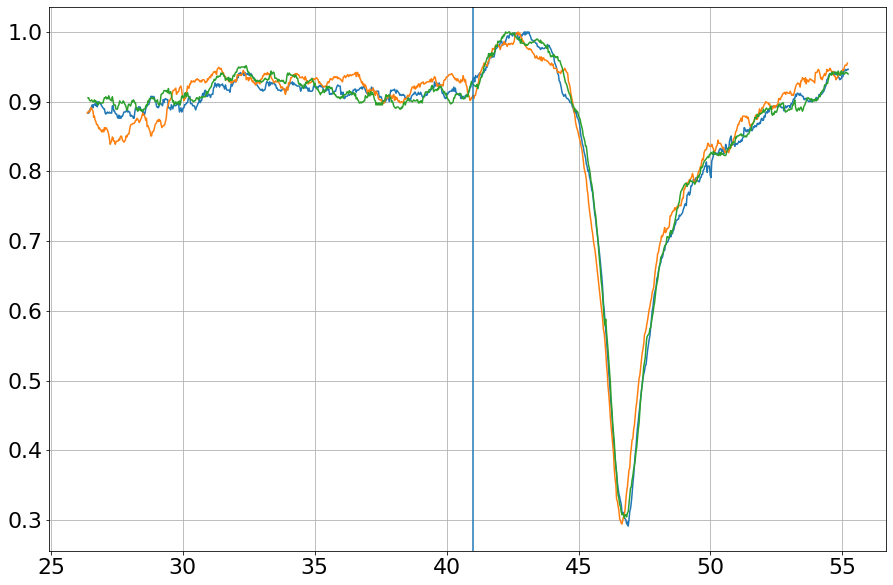

In [42]:
#Green 10nm v2
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt62GC.txt",'reverse',\
           offset=15.75,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt63GC.txt",'forward',\
           offset=15.75,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt64GC.txt",'reverse',\
           offset=15.75,plot=True,plotexts=False)
plt.axvline(x=41)

In [43]:
Set62=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt62GC.txt",'reverse',\
           offset=15.75,hideres=False))
Set63=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt63GC.txt",'forward',\
           offset=15.75,hideres=False)
Set64=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt64GC.txt",'reverse',\
           offset=15.75,hideres=False))
Green10V2Set=[Set62,Set63,Set64]
AverageG10V2=AvgFunc(Green10V2Set)


(42.0, 48.0)

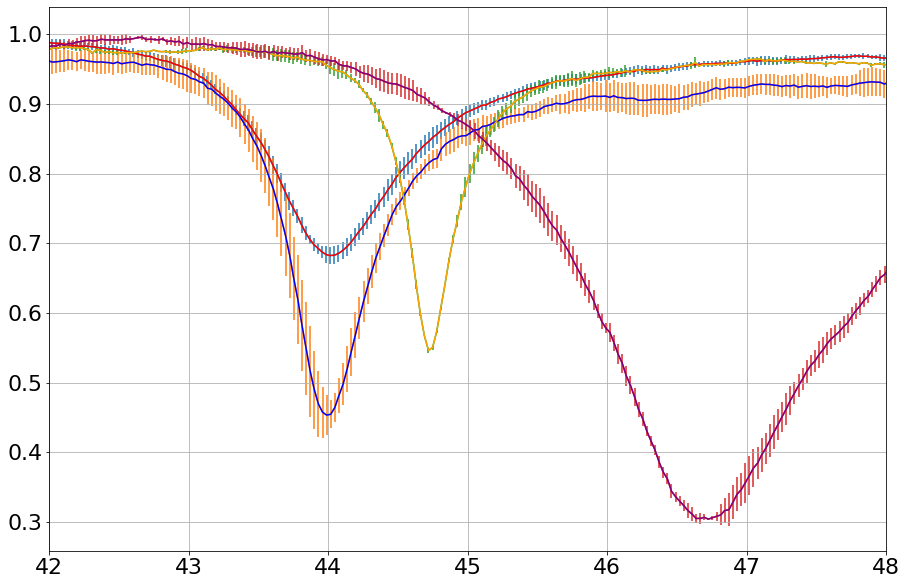

In [44]:
plt.errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1)
plt.plot(Averageg[0][1],Averageg[0][2],color='r',zorder=2)
plt.errorbar(AverageG13[0][1],AverageG13[0][2],yerr=AverageG13[1],zorder=1)
plt.plot(AverageG13[0][1],AverageG13[0][2],color='blue',zorder=2)
plt.errorbar(AverageG15[0][1],AverageG15[0][2],yerr=AverageG15[1],zorder=1)
plt.plot(AverageG15[0][1],AverageG15[0][2],color='orange',zorder=2)
plt.errorbar(AverageG10V2[0][1],AverageG10V2[0][2],yerr=AverageG10V2[1],zorder=1)
plt.plot(AverageG10V2[0][1],AverageG10V2[0][2],color='purple',zorder=2)
plt.grid(True)
#plt.xlim(39,43)
#plt.ylim(0.9,1)
plt.xlim(42,48)

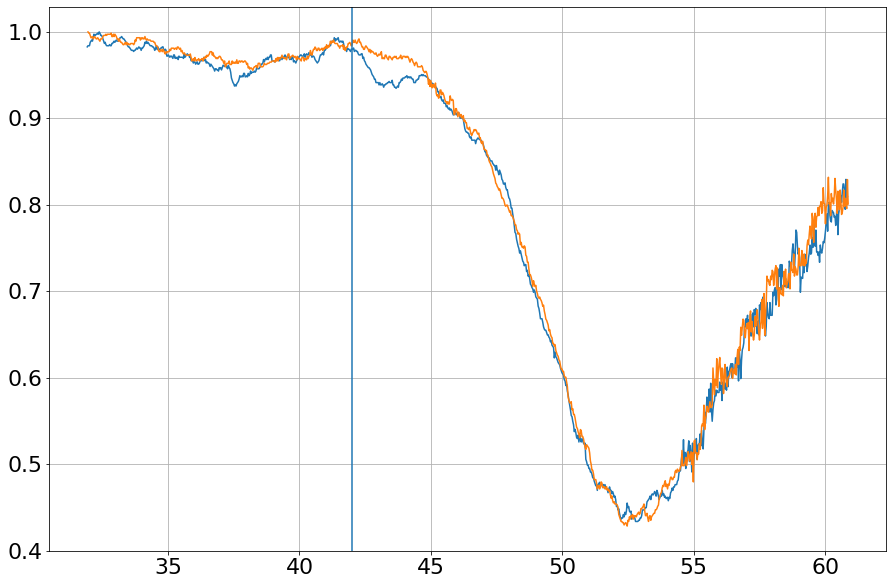

In [45]:
#Blue 10nm V2
myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt65GC.txt",'forward',\
           offset=24.75,plot=True,plotexts=False)
myLoadfunc("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt66GC.txt",'reverse',\
           offset=24.75,plot=True,plotexts=False)
plt.axvline(x=42)

In [46]:
Set65=myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt65GC.txt",'forward',\
           offset=24.75,hideres=False)
Set66=np.fliplr(myLoadfunc("C:\\Users\\gjc10\Desktop\\3rd Year Labs\\Surface Plasmons\\GCres\\Attempt66GC.txt",'reverse',\
           offset=24.75,hideres=False))
Blue10V2Set=[Set65,Set66]
AverageB10V2=AvgFunc(Blue10V2Set)

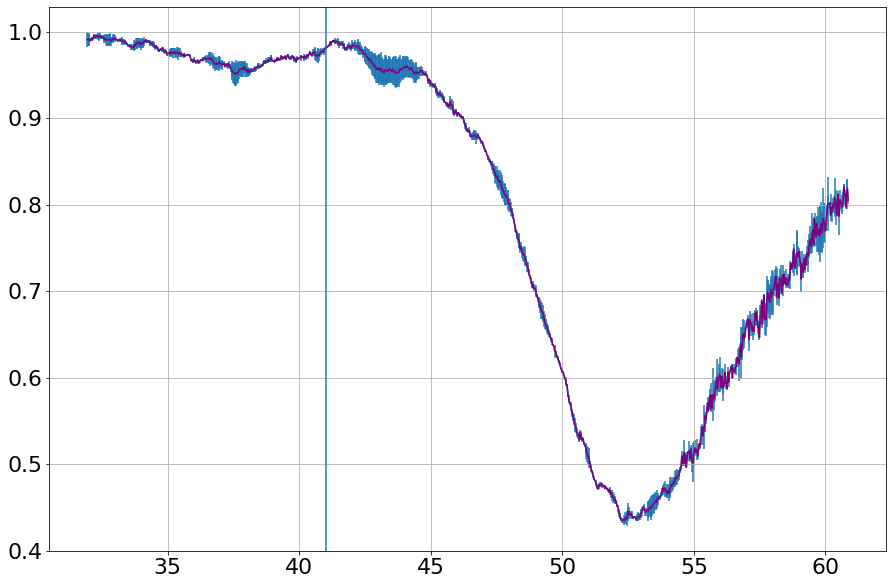

In [47]:
plt.errorbar(AverageB10V2[0][1],AverageB10V2[0][2],yerr=AverageB10V2[1],zorder=1)
plt.plot(AverageB10V2[0][1],AverageB10V2[0][2],color='purple',zorder=2)
plt.grid(True)
plt.axvline(x=41)

(47.0, 53.0)

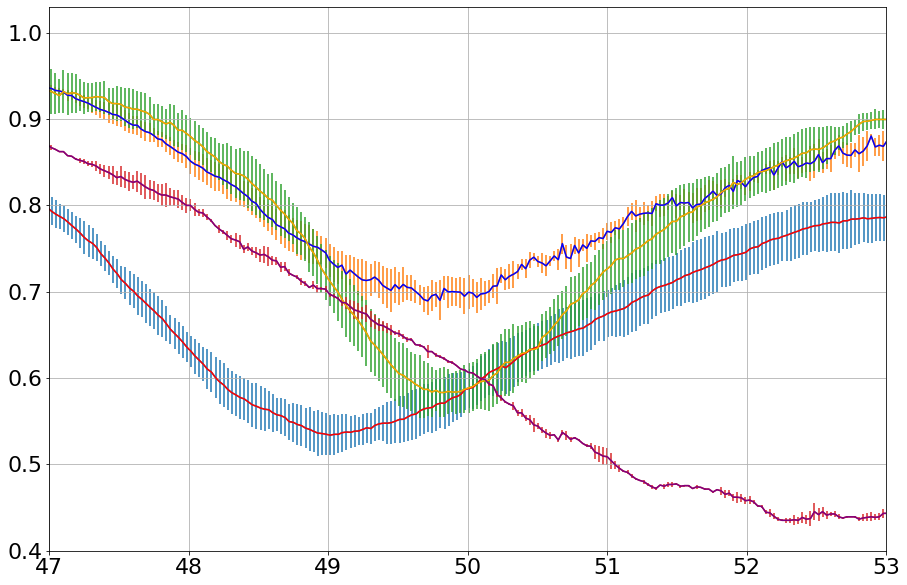

In [48]:
plt.errorbar(Averageb[0][1],Averageb[0][2],yerr=Averageb[1],zorder=1)
plt.plot(Averageb[0][1],Averageb[0][2],color='r',zorder=2)
plt.errorbar(AverageB13[0][1],AverageB13[0][2],yerr=AverageB13[1],zorder=1)
plt.plot(AverageB13[0][1],AverageB13[0][2],color='blue',zorder=2)
plt.errorbar(AverageB15[0][1],AverageB15[0][2],yerr=AverageB15[1],zorder=1)
plt.plot(AverageB15[0][1],AverageB15[0][2],color='orange',zorder=2)
plt.errorbar(AverageB10V2[0][1],AverageB10V2[0][2],yerr=AverageB10V2[1],zorder=1)
plt.plot(AverageB10V2[0][1],AverageB10V2[0][2],color='purple',zorder=2)
plt.grid(True)
#plt.xlim(39,44)
#plt.ylim(0.8,1)
plt.xlim(47,53)

(41.0, 57.0)

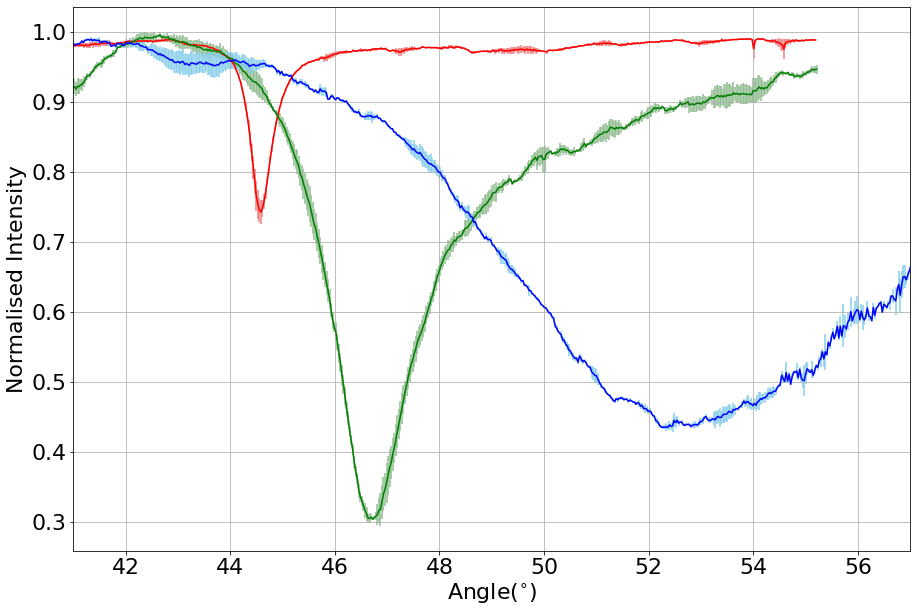

In [55]:
plt.errorbar(AverageR10V2[0][1],AverageR10V2[0][2],yerr=AverageR10V2[1],zorder=1,color='lightcoral')
plt.plot(AverageR10V2[0][1],AverageR10V2[0][2],color='red',zorder=2)
plt.errorbar(AverageG10V2[0][1],AverageG10V2[0][2],yerr=AverageG10V2[1],zorder=1,color='darkseagreen')
plt.plot(AverageG10V2[0][1],AverageG10V2[0][2],color='green',zorder=2)
plt.errorbar(AverageB10V2[0][1],AverageB10V2[0][2],yerr=AverageB10V2[1],zorder=1,color='skyblue')
plt.plot(AverageB10V2[0][1],AverageB10V2[0][2],color='b',zorder=2)
plt.xlabel('Angle($^{\circ}$)')
plt.ylabel('Normalised Intensity')
plt.grid(True)
plt.xlim(41,57)

(39.0, 55.0)

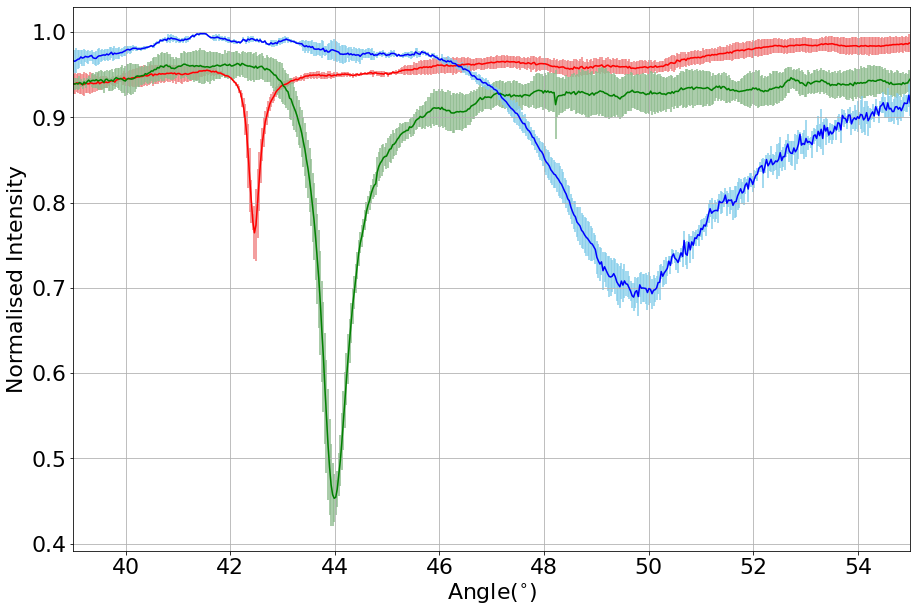

In [56]:
plt.errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1,color='lightcoral')
plt.plot(AverageR13[0][1],AverageR13[0][2],color='red',zorder=2)
plt.errorbar(AverageG13[0][1],AverageG13[0][2],yerr=AverageG13[1],zorder=1,color='darkseagreen')
plt.plot(AverageG13[0][1],AverageG13[0][2],color='green',zorder=2)
plt.errorbar(AverageB13[0][1],AverageB13[0][2],yerr=AverageB13[1],zorder=1,color='skyblue')
plt.plot(AverageB13[0][1],AverageB13[0][2],color='b',zorder=2)
plt.xlabel('Angle($^{\circ}$)')
plt.ylabel('Normalised Intensity')
plt.grid(True)
plt.xlim(39,55)

(42.0, 55.0)

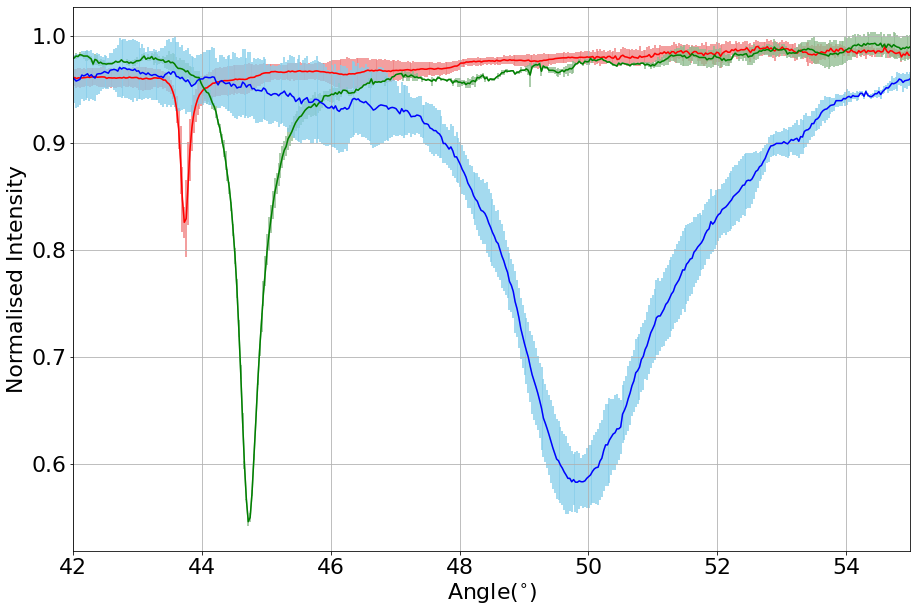

In [58]:
plt.errorbar(AverageR15[0][1],AverageR15[0][2],yerr=AverageR15[1],zorder=1,color='lightcoral')
plt.plot(AverageR15[0][1],AverageR15[0][2],color='red',zorder=2)
plt.errorbar(AverageG15[0][1],AverageG15[0][2],yerr=AverageG15[1],zorder=1,color='darkseagreen')
plt.plot(AverageG15[0][1],AverageG15[0][2],color='green',zorder=2)
plt.errorbar(AverageB15[0][1],AverageB15[0][2],yerr=AverageB15[1],zorder=1,color='skyblue')
plt.plot(AverageB15[0][1],AverageB15[0][2],color='b',zorder=2)
plt.xlabel('Angle($^{\circ}$)')
plt.ylabel('Normalised Intensity')
plt.grid(True)
plt.xlim(42,55)

(41.0, 57.0)

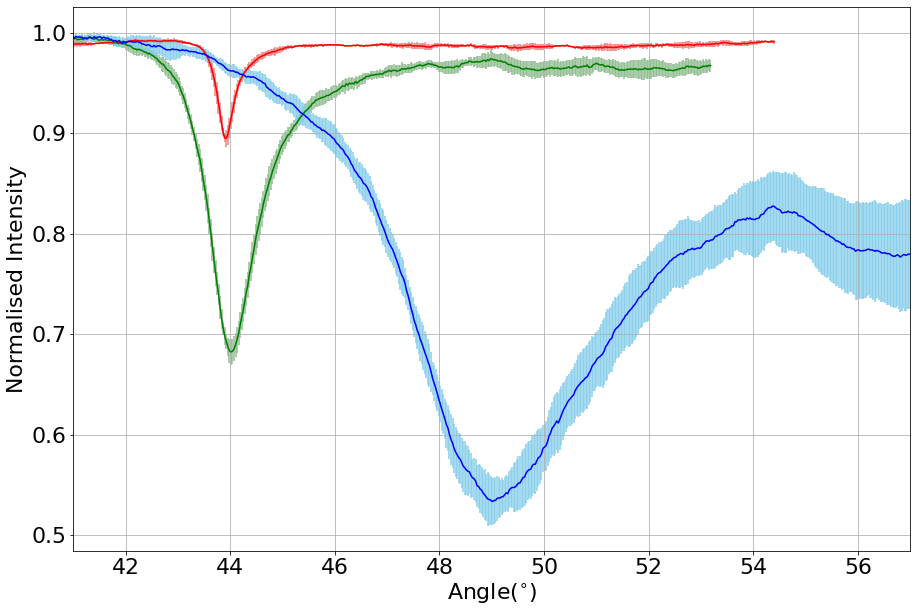

In [61]:
plt.errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],zorder=1,color='lightcoral')
plt.plot(Average1[0][1],Average1[0][2],color='red',zorder=2)
plt.errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1,color='darkseagreen')
plt.plot(Averageg[0][1],Averageg[0][2],color='green',zorder=2)
plt.errorbar(Averageb[0][1],Averageb[0][2],yerr=Averageb[1],zorder=1,color='skyblue')
plt.plot(Averageb[0][1],Averageb[0][2],color='b',zorder=2)
plt.xlabel('Angle($^{\circ}$)')
plt.ylabel('Normalised Intensity')
plt.grid(True)
plt.xlim(41,57)

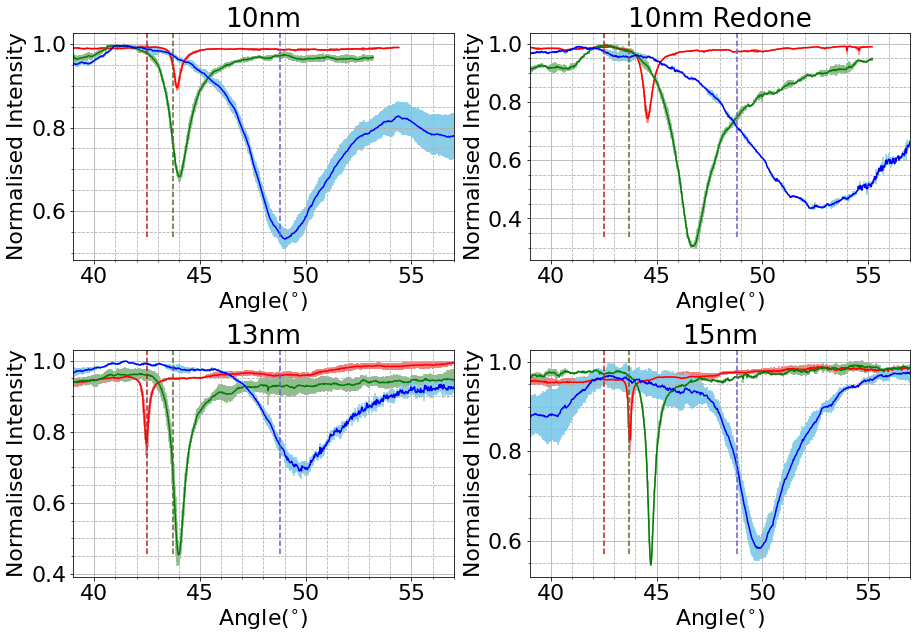

In [122]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],zorder=1,color='lightcoral')
axs[0, 0].plot(Average1[0][1],Average1[0][2],color='red',zorder=2)
axs[0, 0].errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1,color='darkseagreen')
axs[0, 0].plot(Averageg[0][1],Averageg[0][2],color='green',zorder=2)
axs[0, 0].errorbar(Averageb[0][1],Averageb[0][2],yerr=Averageb[1],zorder=1,color='skyblue')
axs[0, 0].plot(Averageb[0][1],Averageb[0][2],color='b',zorder=2)
axs[0, 0].set_title('10nm')
axs[0,0].axvline(x=42.5,ymin=0.1,color='firebrick',linestyle='--')
axs[0,0].axvline(x=43.7,ymin=0.1,color='darkolivegreen',linestyle='--')
axs[0,0].axvline(x=48.8,ymin=0.1,color='slateblue',linestyle='--')
axs[1, 0].errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1,color='lightcoral')
axs[1, 0].plot(AverageR13[0][1],AverageR13[0][2],color='red',zorder=2)
axs[1, 0].errorbar(AverageG13[0][1],AverageG13[0][2],yerr=AverageG13[1],zorder=1,color='darkseagreen')
axs[1, 0].plot(AverageG13[0][1],AverageG13[0][2],color='green',zorder=2)
axs[1, 0].errorbar(AverageB13[0][1],AverageB13[0][2],yerr=AverageB13[1],zorder=1,color='skyblue')
axs[1, 0].plot(AverageB13[0][1],AverageB13[0][2],color='b',zorder=2)
axs[1, 0].set_title('13nm')
axs[1,0].axvline(x=42.5,ymin=0.1,color='firebrick',linestyle='--')
axs[1,0].axvline(x=43.7,ymin=0.1,color='darkolivegreen',linestyle='--')
axs[1,0].axvline(x=48.8,ymin=0.1,color='slateblue',linestyle='--')
axs[1, 1].errorbar(AverageR15[0][1],AverageR15[0][2],yerr=AverageR15[1],zorder=1,color='lightcoral')
axs[1, 1].plot(AverageR15[0][1],AverageR15[0][2],color='red',zorder=2)
axs[1, 1].errorbar(AverageG15[0][1],AverageG15[0][2],yerr=AverageG15[1],zorder=1,color='darkseagreen')
axs[1, 1].plot(AverageG15[0][1],AverageG15[0][2],color='green',zorder=2)
axs[1, 1].errorbar(AverageB15[0][1],AverageB15[0][2],yerr=AverageB15[1],zorder=1,color='skyblue')
axs[1, 1].plot(AverageB15[0][1],AverageB15[0][2],color='b',zorder=2)
axs[1, 1].set_title('15nm')
axs[1,1].axvline(x=42.5,ymin=0.1,color='firebrick',linestyle='--')
axs[1,1].axvline(x=43.7,ymin=0.1,color='darkolivegreen',linestyle='--')
axs[1,1].axvline(x=48.8,ymin=0.1,color='slateblue',linestyle='--')
axs[0, 1].errorbar(AverageR10V2[0][1],AverageR10V2[0][2],yerr=AverageR10V2[1],zorder=1,color='lightcoral')
axs[0, 1].plot(AverageR10V2[0][1],AverageR10V2[0][2],color='red',zorder=2)
axs[0, 1].errorbar(AverageG10V2[0][1],AverageG10V2[0][2],yerr=AverageG10V2[1],zorder=1,color='darkseagreen')
axs[0, 1].plot(AverageG10V2[0][1],AverageG10V2[0][2],color='green',zorder=2)
axs[0, 1].errorbar(AverageB10V2[0][1],AverageB10V2[0][2],yerr=AverageB10V2[1],zorder=1,color='skyblue')
axs[0, 1].plot(AverageB10V2[0][1],AverageB10V2[0][2],color='b',zorder=2)
axs[0, 1].set_title('10nm Redone')
axs[0,1].axvline(x=42.5,ymin=0.1,color='firebrick',linestyle='--')
axs[0,1].axvline(x=43.7,ymin=0.1,color='darkolivegreen',linestyle='--')
axs[0,1].axvline(x=48.8,ymin=0.1,color='slateblue',linestyle='--')
plt.subplots_adjust(hspace=0.4)

for ax in axs.flat:
    ax.set(xlabel='Angle($^{\circ}$)', ylabel='Normalised Intensity')
    ax.minorticks_on()
    ax.grid(True,which='major',)
    ax.grid(True,which='minor',axis='both',linestyle='--')
    ax.set_xlim(39,57)
    
    

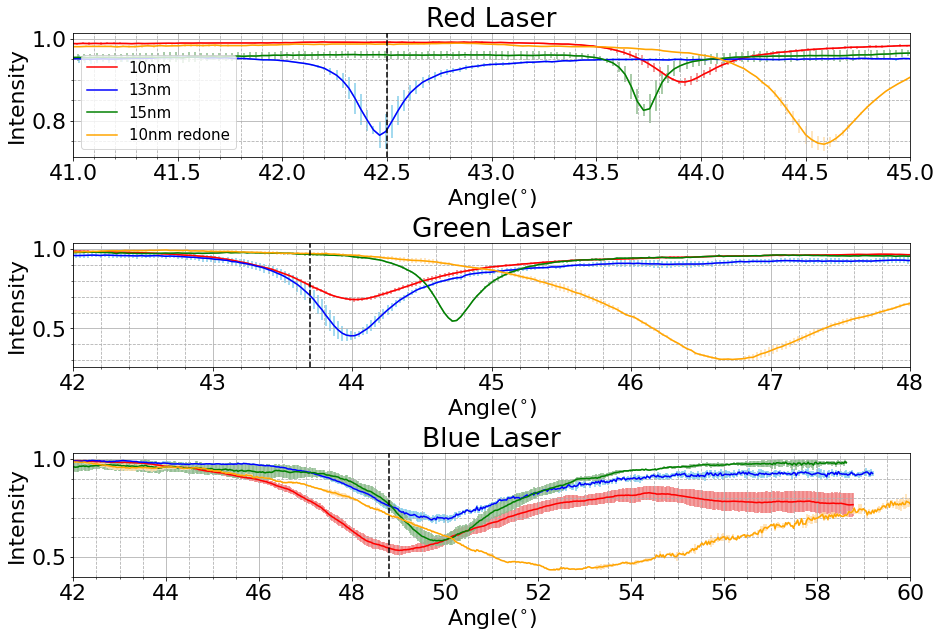

In [124]:
fig2,axs2=plt.subplots(3,1)
axs2[0].errorbar(Average1[0][1],Average1[0][2],yerr=Average1[1],zorder=1,color='lightcoral')
axs2[0].plot(Average1[0][1],Average1[0][2],color='r',zorder=2)
axs2[0].errorbar(AverageR13[0][1],AverageR13[0][2],yerr=AverageR13[1],zorder=1,color='skyblue')
axs2[0].plot(AverageR13[0][1],AverageR13[0][2],color='blue',zorder=2)
axs2[0].errorbar(AverageR15[0][1],AverageR15[0][2],yerr=AverageR15[1],zorder=1,color='darkseagreen')
axs2[0].plot(AverageR15[0][1],AverageR15[0][2],color='green',zorder=2)
axs2[0].errorbar(AverageR10V2[0][1],AverageR10V2[0][2],yerr=AverageR10V2[1],zorder=1,color='navajowhite')
axs2[0].plot(AverageR10V2[0][1],AverageR10V2[0][2],color='orange',zorder=2)
axs2[0].set_title('Red Laser')
axs2[0].set_xlim(41,45)
axs2[0].axvline(x=42.5,color='Black',linestyle='--')
axs2[0].legend(['10nm','13nm','15nm','10nm redone'],loc='lower left',fontsize=15)
axs2[1].errorbar(Averageg[0][1],Averageg[0][2],yerr=Averageg[1],zorder=1,color='lightcoral')
axs2[1].plot(Averageg[0][1],Averageg[0][2],color='r',zorder=2)
axs2[1].errorbar(AverageG13[0][1],AverageG13[0][2],yerr=AverageG13[1],zorder=1,color='skyblue')
axs2[1].plot(AverageG13[0][1],AverageG13[0][2],color='blue',zorder=2)
axs2[1].errorbar(AverageG15[0][1],AverageG15[0][2],yerr=AverageG15[1],zorder=1,color='darkseagreen')
axs2[1].plot(AverageG15[0][1],AverageG15[0][2],color='green',zorder=2)
axs2[1].errorbar(AverageG10V2[0][1],AverageG10V2[0][2],yerr=AverageG10V2[1],zorder=1,color='navajowhite')
axs2[1].plot(AverageG10V2[0][1],AverageG10V2[0][2],color='orange',zorder=2)
axs2[1].set_title('Green Laser')
axs2[1].set_xlim(42,48)
axs2[1].axvline(x=43.7,color='Black',linestyle='--')
axs2[2].errorbar(Averageb[0][1],Averageb[0][2],yerr=Averageb[1],zorder=1,color='lightcoral')
axs2[2].plot(Averageb[0][1],Averageb[0][2],color='r',zorder=2)
axs2[2].errorbar(AverageB13[0][1],AverageB13[0][2],yerr=AverageB13[1],zorder=1,color='skyblue')
axs2[2].plot(AverageB13[0][1],AverageB13[0][2],color='blue',zorder=2)
axs2[2].errorbar(AverageB15[0][1],AverageB15[0][2],yerr=AverageB15[1],zorder=1,color='darkseagreen')
axs2[2].plot(AverageB15[0][1],AverageB15[0][2],color='green',zorder=2)
axs2[2].errorbar(AverageB10V2[0][1],AverageB10V2[0][2],yerr=AverageB10V2[1],zorder=1,color='navajowhite')
axs2[2].plot(AverageB10V2[0][1],AverageB10V2[0][2],color='orange',zorder=2)
axs2[2].set_title('Blue Laser')
axs2[2].set_xlim(42,60)
axs2[2].axvline(x=48.8,color='Black',linestyle='--')
plt.subplots_adjust(hspace=0.7)

for ax in axs2.flat:
    ax.set(xlabel='Angle($^{\circ}$)', ylabel='Intensity')
    ax.minorticks_on()
    ax.grid(True,which='major',)
    ax.grid(True,which='minor',axis='both',linestyle='--')

